# Generalization with OOP: The MLBacktester Class

## Using the MLBacktester Class

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
df = pd.read_csv("five_minute_pairs.csv", parse_dates = ["time"], index_col = "time")
df

,EURUSD,GBPUSD,EURAUD
time,,,
2019-01-01 22:00:00+00:00,1.146580,1.274680,1.626230
2019-01-01 22:05:00+00:00,1.146350,1.274270,1.626170
2019-01-01 22:10:00+00:00,1.146320,1.274760,1.626290
2019-01-01 22:15:00+00:00,1.146320,1.274770,1.626290
2019-01-01 22:20:00+00:00,1.146530,1.274760,1.625620
...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,1.335140,1.617190
2020-08-30 23:40:00+00:00,1.191240,1.335250,1.616890
2020-08-30 23:45:00+00:00,1.191515,1.335515,1.616870


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124056 entries, 2019-01-01 22:00:00+00:00 to 2020-08-30 23:55:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EURUSD  123350 non-null  float64
 1   GBPUSD  123169 non-null  float64
 2   EURAUD  123742 non-null  float64
dtypes: float64(3)
memory usage: 3.8 MB


In [4]:
import MLBacktester as MLB

In [5]:
# import ml_backtester as MLB

### EURUSD

In [6]:
symbol = "GBPUSD=X"

In [7]:
ptc = 0.00007

In [8]:
# ml = MLB.MLBacktester(symbol, "2019-01-01", "2020-08-30", ptc)

In [9]:
ml = MLB.MLBacktester(symbol, "2020-11-01", "2022-08-30", "1d", ptc)

[*********************100%***********************]  1 of 1 completed


In [10]:
ml

MLBacktester(symbol = GBPUSD=X, start = 2020-11-01, end = 2022-08-30, tc = 7e-05)

In [11]:
ml.data

,price,returns
Date,,
2020-11-02 00:00:00+00:00,1.292674,NaN
2020-11-03 00:00:00+00:00,1.292390,-0.000220
2020-11-04 00:00:00+00:00,1.312164,0.015184
2020-11-05 00:00:00+00:00,1.296680,-0.011870
2020-11-06 00:00:00+00:00,1.313940,0.013222
...,...,...
2022-08-23 00:00:00+01:00,1.176651,-0.004375
2022-08-24 00:00:00+01:00,1.183278,0.005617
2022-08-25 00:00:00+01:00,1.179176,-0.003473


In [12]:
ml.test_strategy(train_ratio = 0.7, lags = 3)

(1.056452, 0.193501)

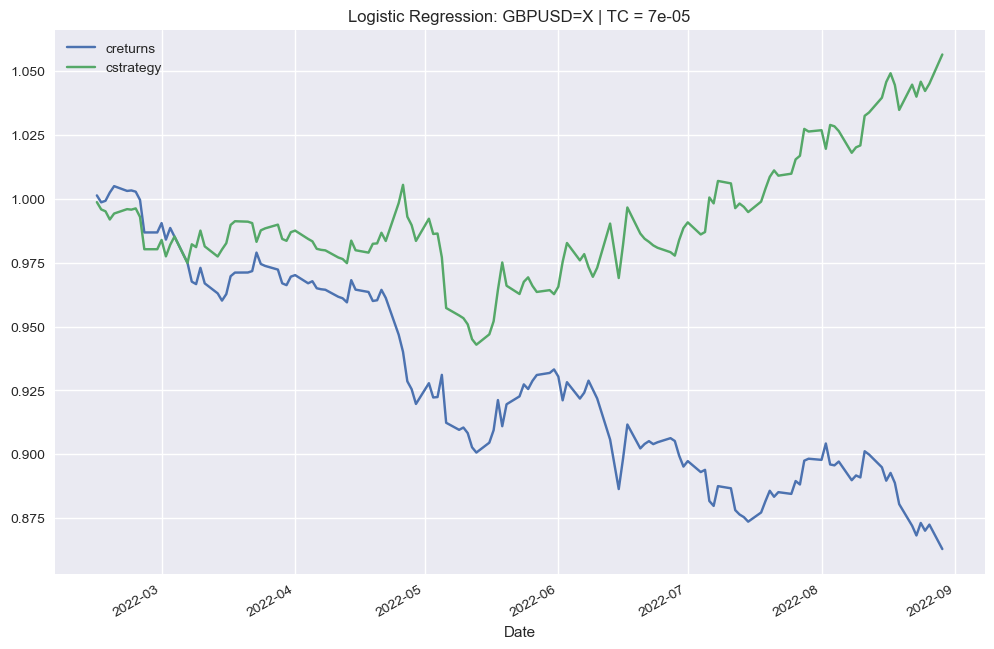

In [13]:
ml.plot_results()

In [14]:
ml.results

,price,returns,lag1,lag2,lag3,pred,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,
2022-02-14 00:00:00+00:00,1.356963,0.001315,0.001368,-0.001056,0.000721,-1.0,-0.001315,0.0,1.001316,0.998685
2022-02-15 00:00:00+00:00,1.353290,-0.002710,0.001315,0.001368,-0.001056,1.0,-0.002850,2.0,0.998606,0.995843
2022-02-16 00:00:00+00:00,1.354115,0.000609,-0.002710,0.001315,0.001368,-1.0,-0.000749,2.0,0.999215,0.995097
2022-02-17 00:00:00+00:00,1.358493,0.003228,0.000609,-0.002710,0.001315,-1.0,-0.003228,0.0,1.002445,0.991890
2022-02-18 00:00:00+00:00,1.361878,0.002489,0.003228,0.000609,-0.002710,1.0,0.002349,2.0,1.004944,0.994223
...,...,...,...,...,...,...,...,...,...,...
2022-08-23 00:00:00+01:00,1.176651,-0.004375,-0.009655,-0.009375,-0.004394,1.0,-0.004515,2.0,0.868262,1.039949
2022-08-24 00:00:00+01:00,1.183278,0.005617,-0.004375,-0.009655,-0.009375,1.0,0.005617,0.0,0.873153,1.045806
2022-08-25 00:00:00+01:00,1.179176,-0.003473,0.005617,-0.004375,-0.009655,1.0,-0.003473,0.0,0.870126,1.042181


__The optimal Number of Lags__

In [15]:
for lags in range(1, 21):
    print(lags, ml.test_strategy(train_ratio = 0.7, lags = lags))

1 (1.021476, 0.158255)
2 (0.990632, 0.126499)
3 (1.056452, 0.193501)
4 (0.996912, 0.135095)
5 (0.972175, 0.108019)
6 (0.959868, 0.096238)
7 (0.985755, 0.124908)
8 (0.999394, 0.140687)
9 (0.955384, 0.095075)
10 (1.002885, 0.14274)
11 (0.976673, 0.116107)
12 (0.987549, 0.124211)
13 (0.967426, 0.092955)
14 (0.941113, 0.066642)
15 (0.951852, 0.080609)
16 (0.958112, 0.081139)
17 (0.940993, 0.068066)
18 (0.965541, 0.089608)
19 (0.93947, 0.054357)
20 (0.921591, 0.029715)


In [16]:
ml.results.trades.value_counts()

2.0    69
0.0    55
Name: trades, dtype: int64

### EURAUD

In [17]:
symbol = "EURAUD=X"

In [18]:
ml = MLB.MLBacktester(symbol, "2021-08-01", "2022-09-17", "1d", 0.00007)

[*********************100%***********************]  1 of 1 completed


In [19]:
ml.test_strategy(train_ratio = 0.7, lags = 1)

(0.933279, -0.06429)

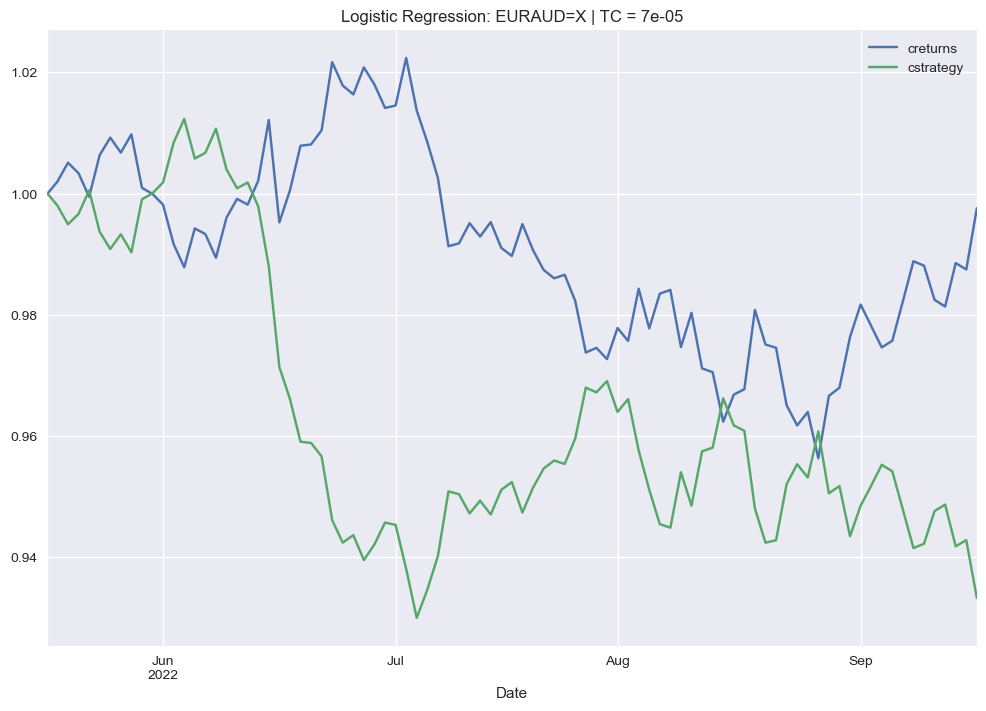

In [20]:
ml.plot_results()

__The optimal Number of Lags__

In [21]:
for lags in range(1, 21):
    print(lags, ml.test_strategy(train_ratio = 0.7, lags = lags))

1 (0.933279, -0.06429)
2 (0.920396, -0.077313)
3 (0.948885, -0.046716)
4 (0.944044, -0.048467)
5 (0.921326, -0.072902)
6 (0.924209, -0.073887)
7 (0.94637, -0.044903)
8 (0.980159, -0.008286)
9 (0.887664, -0.103207)
10 (0.929825, -0.058084)
11 (0.950321, -0.046302)
12 (0.936477, -0.061152)
13 (0.90896, -0.090451)
14 (0.891909, -0.114066)
15 (0.912827, -0.097024)
16 (0.917479, -0.085853)
17 (0.955036, -0.049247)
18 (0.950955, -0.057288)
19 (0.892018, -0.109524)
20 (0.891784, -0.106658)


In [22]:
ml.results

,price,returns,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,...,lag16,lag17,lag18,lag19,lag20,pred,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-13 00:00:00+01:00,1.49448,-0.000950,0.003100,0.006668,-0.003935,-0.000948,0.006477,-0.003847,-0.006546,-0.001785,...,-0.001729,0.003108,0.002115,-0.000140,-0.008738,-1.0,0.000950,0.0,0.999051,1.000950
2022-06-14 00:00:00+01:00,1.50037,0.003933,-0.000950,0.003100,0.006668,-0.003935,-0.000948,0.006477,-0.003847,-0.006546,...,-0.003882,-0.001729,0.003108,0.002115,-0.000140,-1.0,-0.003933,0.0,1.002988,0.997021
2022-06-15 00:00:00+01:00,1.51538,0.009954,0.003933,-0.000950,0.003100,0.006668,-0.003935,-0.000948,0.006477,-0.003847,...,0.006859,-0.003882,-0.001729,0.003108,0.002115,-1.0,-0.009954,0.0,1.013022,0.987145
2022-06-16 00:00:00+01:00,1.49009,-0.016830,0.009954,0.003933,-0.000950,0.003100,0.006668,-0.003935,-0.000948,0.006477,...,0.002856,0.006859,-0.003882,-0.001729,0.003108,1.0,-0.016970,2.0,0.996116,0.970535
2022-06-17 00:00:00+01:00,1.49797,0.005274,-0.016830,0.009954,0.003933,-0.000950,0.003100,0.006668,-0.003935,-0.000948,...,-0.002452,0.002856,0.006859,-0.003882,-0.001729,-1.0,-0.005414,2.0,1.001384,0.965294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-12 00:00:00+01:00,1.47096,-0.005721,-0.000743,0.006709,0.006652,0.001123,-0.003632,-0.003599,0.005465,0.008602,...,-0.005833,0.013430,0.000918,0.004632,-0.008459,-1.0,0.005721,0.0,0.983328,0.907707
2022-09-13 00:00:00+01:00,1.46931,-0.001122,-0.005721,-0.000743,0.006709,0.006652,0.001123,-0.003632,-0.003599,0.005465,...,-0.000555,-0.005833,0.013430,0.000918,0.004632,-1.0,0.001122,0.0,0.982225,0.908726
2022-09-14 00:00:00+01:00,1.48005,0.007283,-0.001122,-0.005721,-0.000743,0.006709,0.006652,0.001123,-0.003632,-0.003599,...,-0.009780,-0.000555,-0.005833,0.013430,0.000918,-1.0,-0.007283,0.0,0.989404,0.902132


In [23]:
hits = np.sign(ml.results.returns * ml.results.pred).value_counts()
hits

-1.0    39
 1.0    31
dtype: int64

In [24]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.44285714285714284